In [18]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [6]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [8]:
x_test[0].shape

(28, 28)

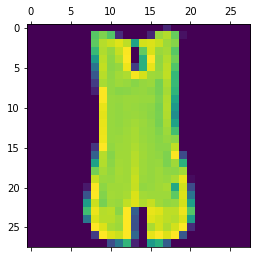

In [16]:
plt.matshow(x_train[4])

In [23]:
print(np.max(x_train))

255


#### Normalize the dataset so that the values are distributed between 0 and 1. This is RGB data where the RGB takes values between 0 and 255. So dividing by 255

In [24]:
x_train = x_train/255
x_test = x_test / 255

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [91]:
model = Sequential()

In [92]:
model.add(Flatten(input_shape=(28,28)))

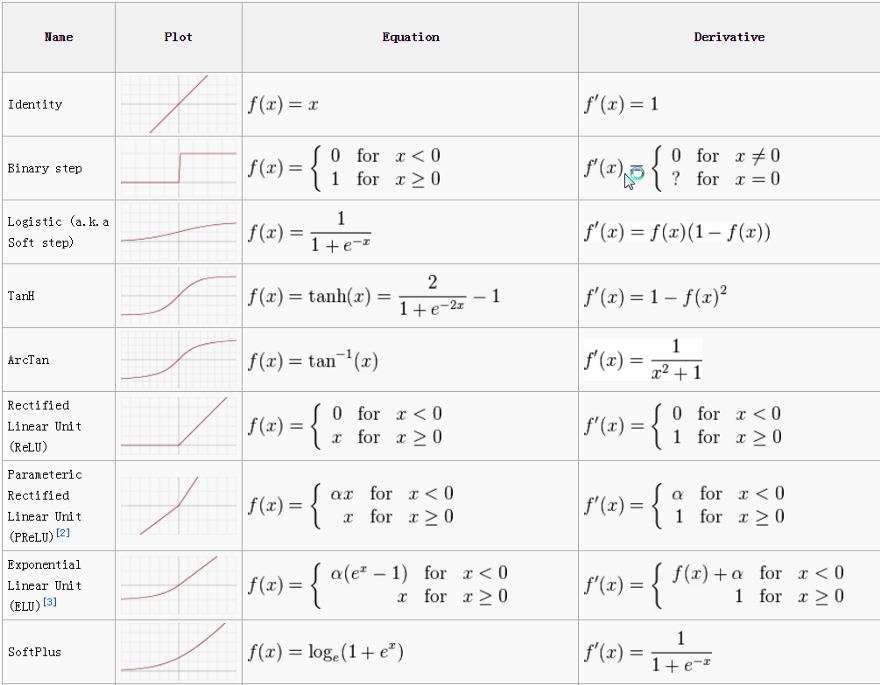

In [101]:
from IPython.display import Image
Image(filename='/Users/vivekm/Downloads/activation_function.png')

In [93]:
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


- loss : A loss function (or objective function, or optimization score function) is one of the two parameters required to compile a model
   Available loss functions: mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_logarithmic_error, squared_hinge, hinge, categorical_hinge, logcosh, huber_loss, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy, kullback_leibler_divergence, poisson, cosine_proximity, is_categorical_crossentropy

- optimizer : 

- A metric is a function that is used to judge the performance of your model. Metric functions are to be supplied in the metrics parameter when a model is compiled.
  Available metrics : accuracy, binary_accuracy, categorical_accuracy, sparse_categorical_accuracy, top_k_categorical_accuracy, sparse_top_k_categorical_accuracy, cosine_proximity, clone_metric

In [95]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer= 'adam',
             metrics=['accuracy'])

In [96]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.4820 - accuracy: 0.8287
Epoch 2/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.3646 - accuracy: 0.8665
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3269 - accuracy: 0.8788
Epoch 4/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3021 - accuracy: 0.8879
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2854 - accuracy: 0.8943
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2698 - accuracy: 0.8991
Epoch 7/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2586 - accuracy: 0.9035
Epoch 8/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.2471 - accuracy: 0.9067
Epoch 9/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.2360 - accuracy: 0.9112
Epoch 10/10
60000/60000 [==============================

In [75]:
label = {'0':'T-shirt/top','1':'Trouser','2':'Pullover','3':'Dress','4':'Coat','5':'Sandal','6':'Shirt',
                            '7':'Sneaker','8':'Bag','9':'Ankle boot'}
label.items()

dict_items([('0', 'T-shirt/top'), ('1', 'Trouser'), ('2', 'Pullover'), ('3', 'Dress'), ('4', 'Coat'), ('5', 'Sandal'), ('6', 'Shirt'), ('7', 'Sneaker'), ('8', 'Bag'), ('9', 'Ankle boot')])

In [97]:
yy = model.predict(x_test)

Ankle boot
Pullover
Trouser
Trouser
Shirt


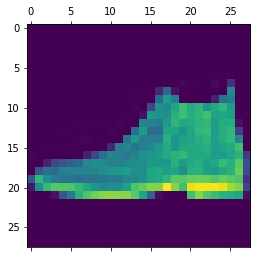

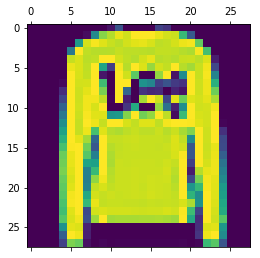

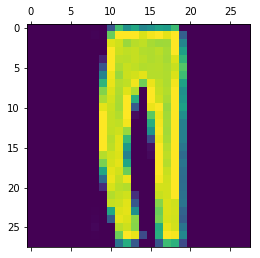

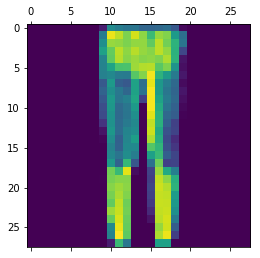

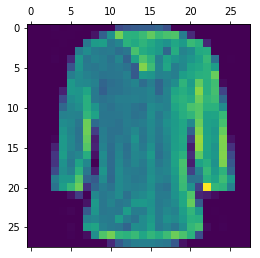

In [98]:
for ii in range(5):
    plt.matshow(x_test[ii])
    print(label[str(np.argmax(yy[ii]))])

In [99]:
print(np.argmax(yy[1]))

2


In [100]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 24us/step


[0.340247099006176, 0.8809999823570251]

In [60]:
print(label)

{'0': 'T-shirt/top', '1': 'Trouser', '2': 'Pullover', '3': 'Dress', '4': 'Coat', '5': 'Sandal', '6': 'Shirt', '7': 'Sneaker', '8': 'Bag', '9': 'Ankle boot'}


num_samples= 3000
WAVELENGTHS = 100
num_classes = 2
model_m = Sequential()
model_m.add(Reshape((WAVELENGTHS, num_sample), input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(WAVELENGTHS, num_sample)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())